<h1 align="Center">Tutorial on Data Analytics in Python using Linear Regression</h1>

In [1]:
# Install a pip pandas package in the current Jupyter kernel
import sys

#Basic Packages installation
!{sys.executable} -m pip install pandas
!{sys.executable} -m pip install numpy

#Packages required for Visualisation
!{sys.executable} -m pip install matplotlib
!{sys.executable} -m pip install seaborn

#For Machine Learning Libraries
!{sys.executable} -m pip install scikit-learn

#For Statistical Model Libraries
!{sys.executable} -m pip install statsmodels


[notice] A new release of pip is available: 24.1.1 -> 24.1.2
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.1.1 -> 24.1.2
[notice] To update, run: pip install --upgrade pip
  Using cached matplotlib-3.9.1-cp312-cp312-macosx_11_0_arm64.whl.metadata (11 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 3.0 MB/s eta 0:00:00a 0:00:01
Using cached matplotlib-3.9.1-cp312-cp312-macosx_11_0_arm64.whl (7.8 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 245.3/245.3 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 7.1 MB/s eta 0:00:00a 0:00:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 6.7 MB/s eta 0:00:0000:0100:01m

[notice] A new release of pip is available: 24.1.1 -> 24.1.2
[notice] To update, run: pip install --upgrade pip
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seabor

<h2 align="center"> 1. Reading and Understanding the data </h2>

In [2]:
#Supress warnings
import warnings

warnings.filterwarnings('ignore')

#Import the numpy and pandas package
import numpy as np
import pandas as pd

#Read the given CSV file and view some sample records
advertising = pd.read_csv('Company_data.csv')

#Print the data
advertising

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [3]:
#Shape of the dataset - Rows and Columns
advertising.shape

(200, 4)

In [4]:
#Info of the dataset
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


<p>As per the above result, it shows that none of the attributes have null values. Hence, we can consider that the data is of good quality of sales data</p>

In [6]:
#Descibe of the dataset
advertising.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


<p> As per the above result, we can see that there is no sudden increase from min, 25%, 50%, 75% and max and it is pretty consistent with through out the records. Also, mean is some what closeer to the 50% and count is pretty stable which proves records are of best quality</p>

<h1 align="center"> 2.Visualizing the data </h1>

<p> Since there are different columns such as TV, Radio, Newspaper with respective to sales, to visually understand the relationship, we are plotting it with the pairplot [ which provides the correlation between them </p>

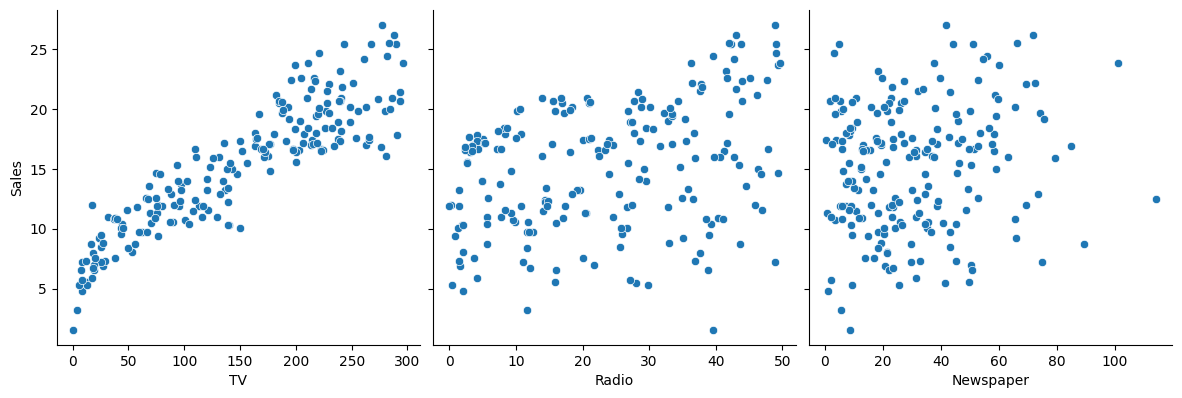

In [12]:
#Import matplotlib and seaborn libraries to visualize the data

import matplotlib.pyplot as plt
import seaborn as sns

# Using pairplot, visualize the data for correlation

sns.pairplot(
             advertising,    #Source DataFrame 
             x_vars=['TV','Radio','Newspaper'], #Specifies which variable to be considered for X-axis
             y_vars='Sales', #Specifies which variable to be considered for Y-axis
             size=4,  #Specifies each subplot in inches
             aspect=1,  #Specifies the aspect ratio of each subplot. Height and width will be same
             kind='scatter' #Specifies the output of scatter plot (default). Others are reg, kde, hist, hex
             )

<p> As the scatter plot is of random and we cannot able to determine the correlation, we can use heatmap for the further analysis </p>

<Axes: >

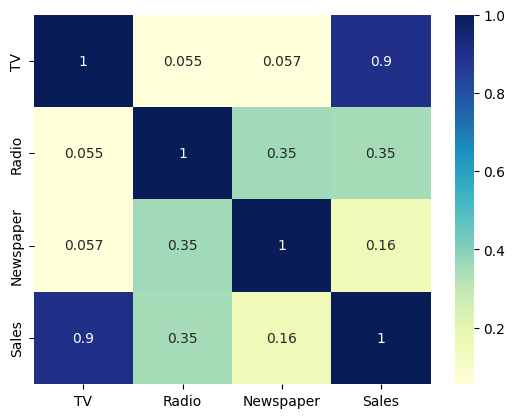

In [15]:
#Visualizing the data using heatmap

#from matplotlib import colormaps
#list(colormaps)        #This will produce the list of color maps available to be used below

sns.heatmap(
            advertising.corr(), #Computes the correlation matrix of source DataFrame
            cmap="YlGnBu",   #Specifies the color map to be used for heatmap
            annot=True      #This will add numerical annotations to each cell of the heatmap
            )

#plt.show()   #Displays all current active figures. In interactive figures such as Jupyter notebook, its not                 required. But in scripts, it needs to be added to show and it makes the figure interactive                   until it closed manually

<p>From the above co-relation matrix, we could see that TV and sales are mostly related with 0.9 and followed by Radio with 0.35 and Newspaper with the least 0.16</p>

<h1 align="center"> 3.Performing Simple Linear Regression for TV </h1>

<h4>General Equation for Linear Regression Model:-</h4>
<p><b>y = c + mX </b></p>
<p>where</p>
<p> y is dependent variable which means it is completely dependent on X [ X value influences Y ] </p>
<p> X is independent variable and it can take any value </p>
<p> c is the starting point of y when x is 0. This is called as <b> intercept </b> which explains the starting point of the relationship </p>
<p> m is the model parameter which explains how much y changes based on x. This is called as <b> slope </b></p>
<br>
<p> In our case, X is TV </p> 

<h4> Linear Regression is created with 4 steps </h4>
<h5> A. Create X and Y </h5>
<h5> B. Create Train and Test Set </h5>
<h5> C. Train your Model </h5>
<h5> D. Evaluate the Model </h5>

<h3 align="center"> A. Create X and Y</h3>

In [17]:
#Performing Linear Regression Model

#Creation of X & Y
X = advertising['TV']
y = advertising['Sales']

<h3 align="center"> B. Create Train and Test Set </h3>

In [18]:
#Splitting the variables as training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
                                                    X, #Represents the Independent Variable
                                                    y, #Represents the Dependent Variable
                                                    train_size=0.7,  #Proportion of Dataset to include in Training set ie) 70% of data will be used for training
                                                    test_size=0.3,  #Proportion of Dataset to include in Testing set ie) 30% of data will be used for testing
                                                    random_state=100 #Random state is set which means everytime we run, it will produce the same set of result
                                                    )

In [31]:
#Print Length of X_train values
print("X Train Total records: ", len(X_train))  #From 200 records, 140 records(ie 0.7 percent) are assigned to Training

#Printing X_train values
X_train

X Train Total records:  140


74     213.4
3      151.5
185    205.0
26     142.9
90     134.3
       ...  
87     110.7
103    187.9
67     139.3
24      62.3
8        8.6
Name: TV, Length: 140, dtype: float64

In [32]:
#Print Length of y_train values
print("Y Train Total records: ", len(y_train))  #From 200 records, 140 records(ie 0.7 percent) are assigned to testing

#Printing y_train values
y_train

Y Train Total records:  140


74     17.0
3      16.5
185    22.6
26     15.0
90     14.0
       ... 
87     16.0
103    19.7
67     13.4
24      9.7
8       4.8
Name: Sales, Length: 140, dtype: float64

In [33]:
#Print Length of X_test values
print("X Test Total records: ", len(X_test))  #From 200 records, 60 records(ie 0.3 percent) are assigned to Testing

#Printing X_test values
X_test

X Test Total records:  60


126      7.8
104    238.2
99     135.2
92     217.7
111    241.7
167    206.8
116    139.2
96     197.6
52     216.4
69     216.8
164    117.2
124    229.5
182     56.2
154    187.8
125     87.2
196     94.2
194    149.7
177    170.2
163    163.5
31     112.9
11     214.7
73     129.4
15     195.4
41     177.0
97     184.9
128    220.3
133    219.8
82      75.3
139    184.9
123    123.1
83      68.4
65      69.0
151    121.0
162    188.4
170     50.0
77     120.5
32      97.2
173    168.4
174    222.4
85     193.2
168    215.4
112    175.7
171    164.5
181    218.5
7      120.2
46      89.7
75      16.9
28     248.8
29      70.6
195     38.2
40     202.5
153    171.3
115     75.1
64     131.1
59     210.7
1       44.5
192     17.2
136     25.6
152    197.6
161     85.7
Name: TV, dtype: float64

In [34]:
#Print Length of y_test values
print("y test Total records: ", len(y_test))  #From 200 records, 60 records(ie 0.3 percent) are assigned to Testing

#Printing y_test values
y_test

y test Total records:  60


126     6.6
104    20.7
99     17.2
92     19.4
111    21.8
167    17.2
116    12.2
96     16.7
52     22.6
69     22.3
164    11.9
124    19.7
182     8.7
154    20.6
125    10.6
196    14.0
194    17.3
177    16.7
163    18.0
31     11.9
11     17.4
73     11.0
15     22.4
41     17.1
97     20.5
128    24.7
133    19.6
82     11.3
139    20.7
123    15.2
83     13.6
65     11.3
151    11.6
162    19.9
170     8.4
77     14.2
32     13.2
173    16.7
174    16.5
85     20.2
168    17.1
112    17.1
171    17.5
181    17.2
7      13.2
46     10.6
75      8.7
28     18.9
29     10.5
195     7.6
40     16.6
153    16.0
115    12.6
64     16.0
59     18.4
1      10.4
192     5.9
136     9.5
152    16.6
161    13.3
Name: Sales, dtype: float64

<h3 align="center"> C. Building and Training Model </h3>

<p>Inorder to create an intercept in the linear regression model(y = c + mX), we need to add a constant manually. For adding constant, we use add_constant method based on X_train dataset </p>

In [35]:
import statsmodels.api as sm

X_train_sm = sm.add_constant(X_train)  #In Linear Regression model, intercept(c) represents the expected value                                       of y when all dependent values of X are 0. Even if the intercept                                             doesnt have physical meaning, adding it allows the regression line to                                        fit better to the data by accounting to the average value of Y. Hence,                                       constant is calculated only for X not for Y.

<p>Once constant has been calculated, we can fit the regression line using OLS method (Ordinary Least Square) method. Post that we will see the c and m values of the straight line </p>

In [36]:
#Fitting the regression line using 'OLS'
lr = sm.OLS(y_train,X_train_sm).fit()

In [37]:
#Printing the parameters
lr.params

const    6.948683
TV       0.054546
dtype: float64

<p>Here, 6.948683 is the intercept value and 0.054546 is the slope value of the line</p>

In [24]:
#Performing a summary to list out all the different parameters of the regression line

lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     611.2
Date:                Thu, 18 Jul 2024   Prob (F-statistic):           1.52e-52
Time:                        11:59:58   Log-Likelihood:                -321.12
No. Observations:                 140   AIC:                             646.2
Df Residuals:                     138   BIC:                             652.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9487      0.385     18.068      0.000       6.188       7.709
TV             0.0545      0.002     24.722      0.000       0.050       0.059
==============================================================================
Omnibus:                        0.027   Durbin-Watson:                   2.196
Prob(Omnibus):                  0.987   Jarque-Bera (JB):                0.150
Skew:                          -0.006   Prob(JB):                        0.928
Kurtosis:                       2.840   Cond. No.                         328.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<p> From the above result, to determine the model, we need to consider below 3 values:</p>
<p> 1. The co-efficients and its p-value</p>
<p> 2. R-squared value </p>
<p> 3. F-statistic and its significance </p> <br>
<p> The coefficient for TV is 0.054, and its corresponding p-value is nearly to 0 which is less than 0.05. That means coefficient is statistically significant </p>
<p> R-squared value is 0.816, which means that 81.6% of the Sales variance that can be explained by this line [which is higher] </p>
<p> Prob F-statistic has very low p-value which is nearly to 0, which gives the model fit is significant </p>

<p> Since the fit is significant, we are visualizing the straight line </p>
<br>
<p> From the above values, the equation becomes after adding slope and intercept </p>
<p> Sales = 6.948 + 0.054 * TV </p>

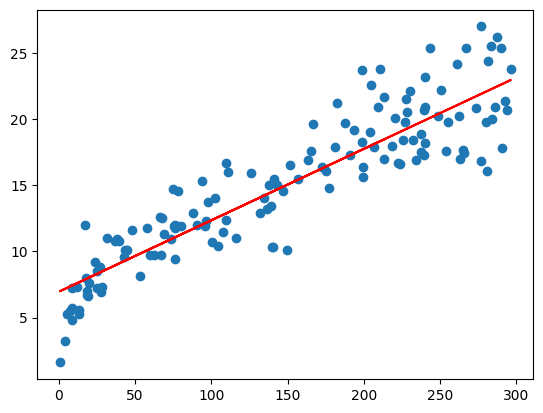

In [40]:
#Visualising the Regression line

plt.scatter(X_train, y_train)
plt.plot(X_train, 6.948 + 0.054 * X_train, 'r')   #r stands for color of the line which means red
#plt.show()

<p> The above plot shows the best fit regression line </p>
<p> Before we evaluate the model on test data, we have to perform residual analysis</p>

<h1 align = "center"> 4. Residual Analysis </h1>

<p> One of the major assumptions of the Linear Regression model is that the error terms are normally distributed </p><br>
<h3>Error = Actual y value - y Predicted value</h3>
<p>Now from the dataset,</p>
<p>we have to predict the y value from the training dataset of X using the predict attribute. After that, we will create the Residuals/error terms from the predicted data</p>

In [43]:
#Predicting y_value using training data of X

y_train_pred = lr.predict(X_train_sm)  #This method predicts the values of y based on X_train_sm, which                                              includes the intercept term. The predictions (y_train_pred) will be                                          based on the coefficients learned during the models fitting process                                          including the intercepts

#Creating residuals from the y_train data and predicted y_data
res = (y_train - y_train_pred)  #Here y_train is the actual Y values and y_train_pred is the y predicted values

In [45]:
#Printing residuals
res

74    -1.588747
3      1.287635
185    4.469437
26     0.256729
90    -0.274178
         ...   
87     3.013102
103    2.502170
67    -1.146907
24    -0.646884
8     -2.617777
Length: 140, dtype: float64

<p>Plotting Histogram of the residuals to check whether it looks like normal distribution or not</p>

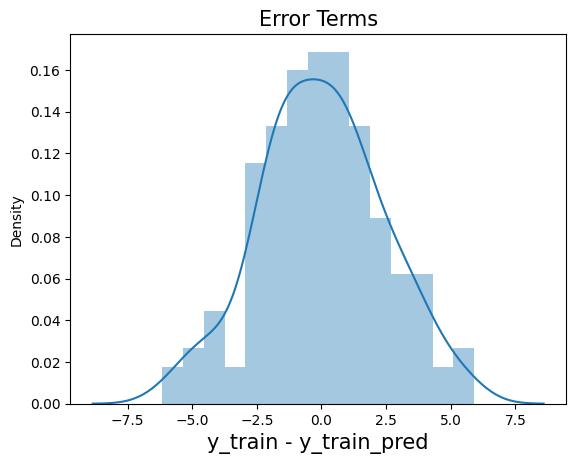

In [52]:
#Plotting the histogram using the residual values

fig = plt.figure()  #Creates a new figure object where we can customize the overall layout and appearance of                     the plot

sns.distplot(res, bins=15)   #res is calculated residuals values and bins is no of intervals to divide the                                 data into for the histogram

plt.title('Error Terms', fontsize = 15)
plt.xlabel('y_train - y_train_pred', fontsize = 15)
plt.show()

<p>Based on the above plot, we can see that the residuals are following the normal distribution graph with mean 0</p>
<p> Now we are checking for the residuals that are not following any patterns </p>

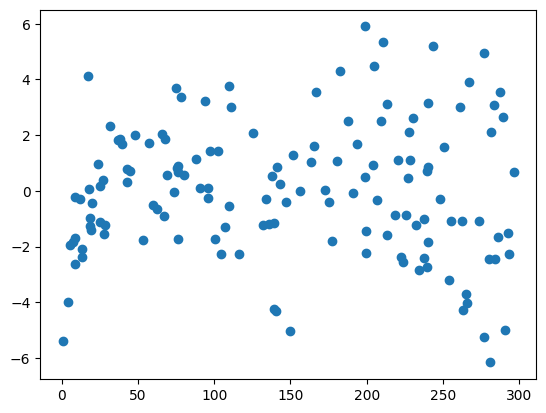

In [28]:
#Looking for any patterns in the residuals
plt.scatter(X_train, res)
plt.show()

<p>Since the residuals follow a normal distribution and does not follow any pattern, we can use the linear regression model to build and evaluate test data</p>

<h3 align="center"> D. Evaluating the model / Predictions on test Data </h3>

<p> Similar to the training data, for test data we need to create an constant for predictions </p>

In [53]:
#Adding a constant to X_test
X_test_sm = sm.add_constant(X_test)

#Predicting the y values corresponding to X_test_sm
y_test_pred = lr.predict(X_test_sm)

In [54]:
#Printing the predicted values
y_test_pred

126     7.374140
104    19.941482
99     14.323269
92     18.823294
111    20.132392
167    18.228745
116    14.541452
96     17.726924
52     18.752384
69     18.774202
164    13.341445
124    19.466933
182    10.014155
154    17.192376
125    11.705073
196    12.086893
194    15.114182
177    16.232370
163    15.866914
31     13.106899
11     18.659656
73     14.006904
15     17.606923
41     16.603281
97     17.034193
128    18.965113
133    18.937840
82     11.055978
139    17.034193
123    13.663265
83     10.679613
65     10.712340
151    13.548719
162    17.225103
170     9.675971
77     13.521446
32     12.250530
173    16.134188
174    19.079659
85     17.486923
168    18.697838
112    16.532372
171    15.921460
181    18.866930
7      13.505083
46     11.841437
75      7.870506
28     20.519667
29     10.799613
195     9.032331
40     17.994198
153    16.292371
115    11.045069
64     14.099631
59     18.441473
1       9.375969
192     7.886870
136     8.345054
152    17.7269

<h4 align="center"> Caculating R2 Score for the Predicted values</h4>

In [30]:
#Importing r2_square
from sklearn.metrics import r2_score

#Checking the R-squared value
r_squared = r2_score(y_test, y_test_pred)

r_squared

0.7921031601245656

<p> R2 Score of the Testing data = 0.792 </p>
<p> For the training data, we have got R2 Score as 0.815 </p>
<br>
<p> Since the R2 score on the test data is within 5 percent of the R2 score on the training data, we can say that the model is pretty stable</p>
<p> This proves that the model has learned on the training set on the unseen test set </p>

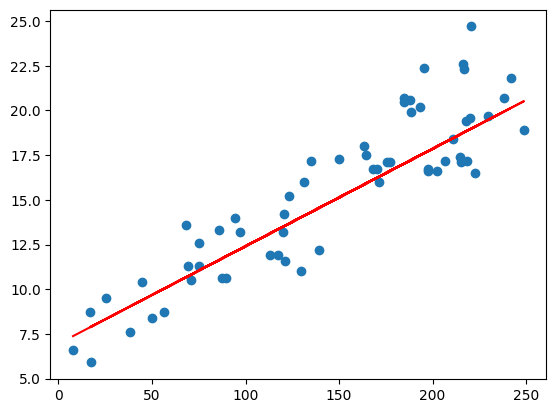

In [32]:
#Visualize the line on the test set
plt.scatter(X_test, y_test)
plt.plot(X_test, y_test_pred, 'r')  #r denotes red color
plt.show()

<p> The above code is for the Linear regression model built with statsmodel. The same can be done with sklearn as the follwing </p>

In [39]:
##Splitting the data into train set and test

from sklearn.model_selection import train_test_split

#Passing the same set of values
X_train_lm, X_test_lm, y_train_lm, y_test_lm = train_test_split(X, 
                                                                y, 
                                                                train_size=0.7, 
                                                                test_size=0.3, 
                                                                random_state=100
                                                                )

In [40]:
#Shape of the train set without adding column
X_train_lm.shape

(140,)

<p> For simple Linear Regression Model, we need to add a column to perform regresson fit properly </p>

In [41]:
#Adding additional column to train and test data
X_train_lm = X_train_lm.values.reshape(-1,1)   #X_train_lm.values is used to convert the DataFrame into NumPy                                                Array. 
                                               # Reshape reshapes the Numpy array to a specific shape. 
                                               #The first placeholder -1 denotes that it provides the data as many as need for this dimension to work
                                               #Second placeholder 1 the reshaped array should have only 1 column
X_test_lm = X_test_lm.values.reshape(-1,1)

print(X_train_lm.shape)
print(X_test_lm.shape)

(140, 1)
(60, 1)


In [42]:
from sklearn.linear_model import LinearRegression

#Creating an object of Linear Regression
lm = LinearRegression()

#Fit the model using .fit() method
lm.fit(X_train_lm, y_train_lm)

LinearRegression()

In [43]:
#Intercept value
print("Intercept :", lm.intercept_)

#Slope value
print("Slope :", lm.coef_)

Intercept : 6.948683200001357
Slope : [0.05454575]


<p> As same as earlier, intercept is 6.948 and slope is 0.054 </p>
<p> Sales = 6.948 + 0.054 * TV </p>

In [44]:
#Make Predictions of y_value

y_train_pred = lm.predict(X_train_lm)
y_test_pred = lm.predict(X_test_lm)

#Comparing the r2 value of both train and test data
print(r2_score(y_train, y_train_pred))
print(r2_score(y_test, y_test_pred))

0.8157933136480389
0.7921031601245662


<p> As we can see for both training and test data,we got the same result and test data is within the range of 5 percent of training data </p>